# 1 - Perkenalan

Nama:Suma Bimantoro Andru

Batch:FTDS-015

Dataset: phase1_ftds_015_rmt

Objective:<b>Buat model clustering untuk melakukan Customer Segmentation dari data kartu kredit dari data 6 bulan dengan id ganjil </b>

# 2 - Import Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
import matplotlib as mpl
from statsmodels.stats.outliers_influence import variance_inflation_factor
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_moons

# 3 - Data Loading

<h1>Query dari BQ</h1>
<b>select</b> * <b><br>from</b> `ftds-hacktiv8-project.phase1_ftds_015_rmt.credit-card-information`
<b><br>where</b> mod(CUST_ID, 2) = 1

In [2]:
#load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phase1/GC4/dataset/h8dsft_P1G4_Suma_bimantoro_andru.csv')

In [4]:
#Tampilkan Head
data.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.59841,0.0,8


In [5]:
#Tampilkan Tail
data.tail(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


In [6]:
# Duplicate Dataset

data_copy = data.copy()

In [7]:
#tampilkan informasi untuk melihat field
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

<p>Di dataset ini ada <b>18</b> columns dan <b>4475</b> row, tipe data semua <b>numerik</b></p>

In [8]:
#check dataset
data.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<p>Terlihat dari <b>median</b> bernilai <b>60</b>, yang artinya banyak <b>umur 60</b> dan umur paling muda di umur <b>40</b></p>

# 4 - Exploratory Data Analysis (EDA)

<h1>CUST_ID</h1>

costumer it

In [9]:
data['CUST_ID'].unique()

array([3091, 5069, 6075, ..., 7347, 8447, 1995])

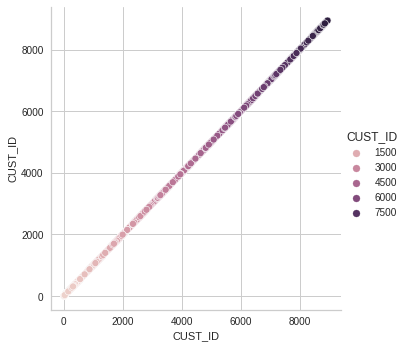

In [10]:
sns.relplot(data=data, x="CUST_ID", y="CUST_ID", hue="CUST_ID")

<h1><b>BALANCE</b></h1>

In [11]:
#cek Feature
data['BALANCE'].unique()

array([   3.833185,    0.      ,  757.964752, ..., 1322.818587,
       1060.391273, 3447.674222])

<p>jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian</p>

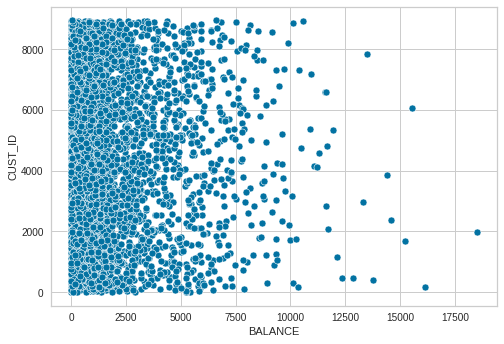

In [12]:
#membuat count plot
sns.scatterplot(data=data, x="BALANCE", y="CUST_ID")

<p>Jumlah balance yang paling banyak ada di range 0- 7000</p>

<h1><b>BALANCE_FREQUENCY </b></h1>

seberapa sering saldo diperbarui

In [13]:
#cek column age
data['BALANCE_FREQUENCY'].unique()

array([0.125   , 0.      , 0.875   , 0.375   , 1.      , 0.454545,
       0.727273, 0.545455, 0.363636, 0.909091, 0.272727, 0.625   ,
       0.636364, 0.818182, 0.181818, 0.5     , 0.833333, 0.7     ,
       0.3     , 0.6     , 0.25    , 0.75    , 0.090909, 0.888889,
       0.285714, 0.428571, 0.142857, 0.571429, 0.2     , 0.4     ,
       0.9     , 0.8     , 0.333333, 0.666667, 0.444444, 0.166667,
       0.555556, 0.714286, 0.857143, 0.777778, 0.1     , 0.222222,
       0.111111])

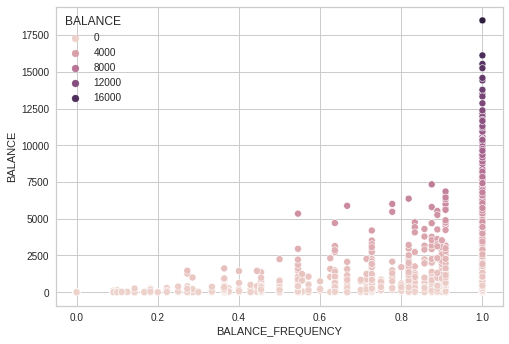

In [14]:
#membuat count plot
sns.scatterplot(data=data, x="BALANCE_FREQUENCY", y="BALANCE", hue="BALANCE")

<p>Saldo yang sering diperbarui adalah saldo yang limit balancennya besar</p>

<b><h1>PURCHASES</h1></b>

jumlah pembelian yang dilakukan dari akun

In [15]:
data['PURCHASES'].unique()

array([ 45.  , 176.03, 157.4 , ..., 797.5 , 285.07, 205.  ])

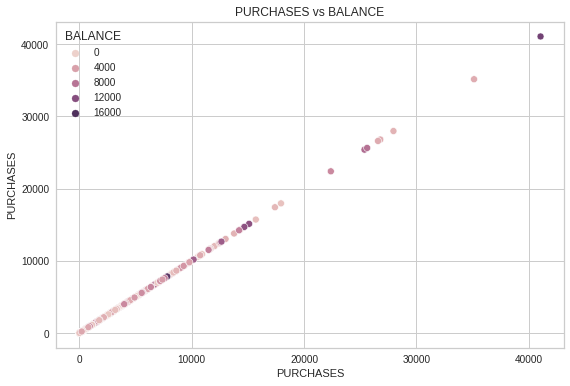

In [16]:
#membuat plot untuk melihat berhubungan feature dengan target
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='PURCHASES', y='PURCHASES', data=data, hue='BALANCE')
plt.title('PURCHASES vs BALANCE')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES')
plt.show()

<p>jumlah pembelian dari semua acount dari rate 0 sampai 18.00 yang banyak </p>

<h1><b>ONEOFF_PURCHASES<b></h1>

jumlah pembelian maksimum dilakukan dalam sekali jalan

In [17]:
#cek column
data['ONEOFF_PURCHASES'].unique()


array([ 45.  , 176.03, 157.4 , ..., 577.83, 285.07, 205.  ])

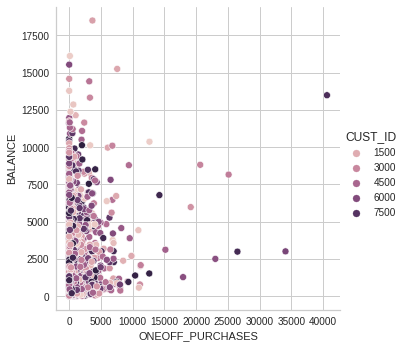

In [18]:
#membuat Plot
sns.relplot(data=data, x="ONEOFF_PURCHASES", y="BALANCE", hue="CUST_ID")

<h1><b>INSTALLMENTS_PURCHASES</b></h1>

jumlah pembelian yang dilakukan secara angsuran

In [19]:
#cek dataset column
data['INSTALLMENTS_PURCHASES'].unique()

array([  0.  , 178.15, 114.  , ..., 482.68,  92.07, 219.67])

<p>jumlah pembelian secara angsuran</p>

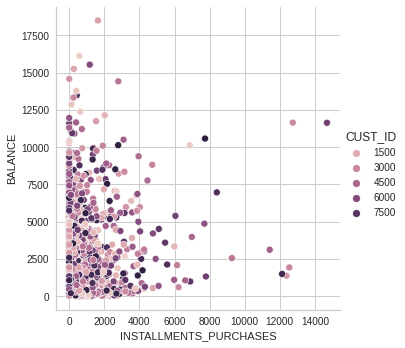

In [20]:
#membuat Plot
sns.relplot(data=data, x="INSTALLMENTS_PURCHASES", y="BALANCE", hue="CUST_ID")

<p>balance 2500 menumpunk angsuran di 2000</p>

<h1><b>CASH_ADVANCE</h1></b>

uang tunai di muka yang diberikan oleh pengguna

<b><h1>PURCHASES_FREQUENCY</h1></b>

seberapa sering pembelian dilakukan

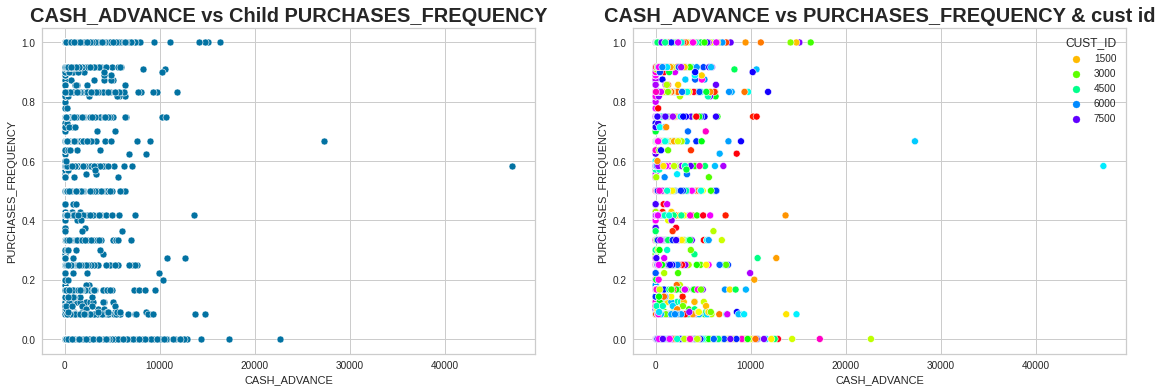

In [21]:
#membuat Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='CASH_ADVANCE',y='PURCHASES_FREQUENCY', data=data)
plt.title('CASH_ADVANCE vs Child PURCHASES_FREQUENCY',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.scatterplot(x='CASH_ADVANCE',y='PURCHASES_FREQUENCY',hue='CUST_ID', data=data, palette='gist_rainbow')
plt.title('CASH_ADVANCE vs PURCHASES_FREQUENCY & cust id',fontweight="bold", size=20)
plt.subplots_adjust(right=1.2)
plt.show()

<p>Uang tunai yang diberikan pengguna tertumpuk di nomor 02, yang artinya tidak begitu sering transaksi dengan uang muka </p>

<h1><b>ONEOFF_PURCHASES_FREQUENCY</h1></b>

seberapa sering pembelian terjadi dalam sekali jalan

<h1><b>PURCHASES_INSTALLMENTS_FREQUENCY</b></h1>

seberapa sering pembelian secara angsuran

<h1><b>CASH_ADVANCE_FREQUENCY</b></h1>

Seberapa sering cash

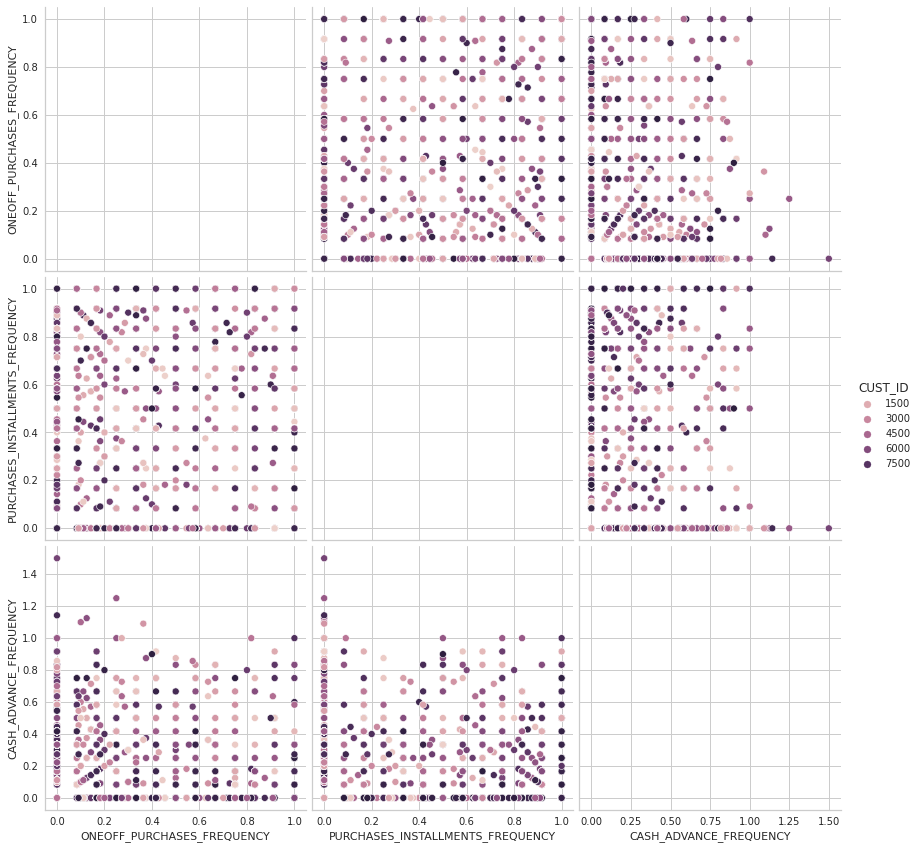

In [22]:
#membuat pairplot
sns.set_style("whitegrid");
sns.pairplot(data, hue="CUST_ID", vars = ["ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY", "CASH_ADVANCE_FREQUENCY"], height=4);
plt.show()

terlhita korelasi antara angsuran dan cash, tetapi tidak berkorelasi dengan pembelian sekali jalan

<h1><b>C-MAP</b></h1>

In [23]:
#melihat corelasi dengan c-map
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

#Correlation Between Numeric Columns
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,1.000000,-0.021686,0.016669,0.007874,0.005534,0.008029,-0.036737,0.008931,-0.006083,0.007658,-0.023148,-0.003485,0.001074,-0.017912,-0.001595,0.035194,-0.002619,0.005505
BALANCE,-0.021686,1.000000,0.320619,0.187328,0.167061,0.124402,0.520446,-0.077008,0.066430,-0.060508,0.466017,0.383785,0.159587,0.524961,0.314899,0.384727,-0.320950,0.072758
BALANCE_FREQUENCY,0.016669,0.320619,1.000000,0.135298,0.101296,0.126404,0.110155,0.226440,0.202556,0.172290,0.191027,0.137942,0.187932,0.088156,0.062314,0.128450,-0.065548,0.118922
PURCHASES,0.007874,0.187328,0.135298,1.000000,0.910604,0.629758,-0.052427,0.406943,0.505073,0.324841,-0.116927,-0.062805,0.697422,0.361141,0.614773,0.122752,0.180073,0.086942
ONEOFF_PURCHASES,0.005534,0.167061,0.101296,0.910604,1.000000,0.252461,-0.044112,0.267201,0.523013,0.125705,-0.084448,-0.048800,0.526970,0.324166,0.569453,0.065777,0.129681,0.068452
INSTALLMENTS_PURCHASES,0.008029,0.124402,0.126404,0.629758,0.252461,1.000000,-0.039929,0.450342,0.199310,0.524022,-0.115095,-0.055383,0.642286,0.236124,0.369109,0.163527,0.178064,0.074732
CASH_ADVANCE,-0.036737,0.520446,0.110155,-0.052427,-0.044112,-0.039929,1.000000,-0.210290,-0.079799,-0.167850,0.661395,0.681496,-0.045941,0.303921,0.418203,0.143400,-0.167600,-0.061952
PURCHASES_FREQUENCY,0.008931,-0.077008,0.226440,0.406943,0.267201,0.450342,-0.210290,1.000000,0.502653,0.861212,-0.299092,-0.188039,0.562436,0.106659,0.108692,0.016398,0.322448,0.051175
ONEOFF_PURCHASES_FREQUENCY,-0.006083,0.066430,0.202556,0.505073,0.523013,0.199310,-0.079799,0.502653,1.000000,0.137608,-0.106753,-0.053327,0.530432,0.265947,0.253170,-0.037131,0.176696,0.093386
PURCHASES_INSTALLMENTS_FREQUENCY,0.007658,-0.060508,0.172290,0.324841,0.125705,0.524022,-0.167850,0.861212,0.137608,1.000000,-0.248807,-0.153798,0.525132,0.049628,0.091086,0.044943,0.256954,0.054934


Terlihat semua berkorelasi, hanya cust id yang tidak berkorelasi, tetapi semua column dipakai karena mau mensegmentasi user

# 5 - Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get data for model inference

In [24]:
## Get data for model inference
data_inf = data.sample(20, random_state=17)
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2463,8691,6644.829230,1.000000,0.00,0.00,0.00,2557.006793,0.000000,0.000000,0.000000,0.250000,9,0,7600.0,1648.570068,2284.360915,0.000000,12
3291,7711,7.696813,0.090909,111.30,111.30,0.00,101.656544,0.083333,0.083333,0.000000,0.083333,1,2,1200.0,0.000000,NaN,0.000000,12
3589,1795,850.630114,1.000000,0.05,0.05,0.00,1700.634586,0.083333,0.083333,0.000000,0.333333,7,1,1000.0,1084.281127,367.409536,0.000000,12
3652,2849,391.508345,0.888889,80.99,80.99,0.00,2867.104779,0.111111,0.111111,0.000000,0.333333,3,1,1500.0,3855.328673,149.615036,0.200000,9
904,6567,349.855056,1.000000,3200.50,2097.88,1102.62,0.000000,1.000000,1.000000,1.000000,0.000000,0,50,7000.0,3119.528249,192.900599,1.000000,12
232,8911,900.229315,1.000000,250.72,250.72,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,6,6500.0,2362.786253,259.315944,0.083333,12
322,8355,150.071799,0.818182,1800.00,0.00,1800.00,0.000000,0.750000,0.000000,0.666667,0.000000,0,9,5000.0,2021.257541,166.582953,1.000000,12
3382,5549,4858.925320,1.000000,9282.12,1578.86,7703.26,4446.461559,0.833333,0.500000,0.666667,0.083333,1,111,9000.0,16822.586450,3983.471892,0.000000,12
2657,5753,955.117067,1.000000,0.00,0.00,0.00,3798.701398,0.000000,0.000000,0.000000,0.500000,13,0,4500.0,2413.364689,284.390966,0.000000,12
3303,2189,7024.269179,1.000000,130.40,0.00,130.40,1916.534565,0.333333,0.000000,0.250000,0.083333,1,4,10200.0,0.000000,NaN,0.000000,12


In [25]:
# remove inference set from data set
data_train_test = data.drop(data_inf.index)
data_train_test

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [26]:
#reset index to reduce error
data_train_test.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,8691,6644.829230,1.000000,0.00,0.00,0.00,2557.006793,0.000000,0.000000,0.000000,0.250000,9,0,7600.0,1648.570068,2284.360915,0.000000,12
1,7711,7.696813,0.090909,111.30,111.30,0.00,101.656544,0.083333,0.083333,0.000000,0.083333,1,2,1200.0,0.000000,NaN,0.000000,12
2,1795,850.630114,1.000000,0.05,0.05,0.00,1700.634586,0.083333,0.083333,0.000000,0.333333,7,1,1000.0,1084.281127,367.409536,0.000000,12
3,2849,391.508345,0.888889,80.99,80.99,0.00,2867.104779,0.111111,0.111111,0.000000,0.333333,3,1,1500.0,3855.328673,149.615036,0.200000,9
4,6567,349.855056,1.000000,3200.50,2097.88,1102.62,0.000000,1.000000,1.000000,1.000000,0.000000,0,50,7000.0,3119.528249,192.900599,1.000000,12
5,8911,900.229315,1.000000,250.72,250.72,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,6,6500.0,2362.786253,259.315944,0.083333,12
6,8355,150.071799,0.818182,1800.00,0.00,1800.00,0.000000,0.750000,0.000000,0.666667,0.000000,0,9,5000.0,2021.257541,166.582953,1.000000,12
7,5549,4858.925320,1.000000,9282.12,1578.86,7703.26,4446.461559,0.833333,0.500000,0.666667,0.083333,1,111,9000.0,16822.586450,3983.471892,0.000000,12
8,5753,955.117067,1.000000,0.00,0.00,0.00,3798.701398,0.000000,0.000000,0.000000,0.500000,13,0,4500.0,2413.364689,284.390966,0.000000,12
9,2189,7024.269179,1.000000,130.40,0.00,130.40,1916.534565,0.333333,0.000000,0.250000,0.083333,1,4,10200.0,0.000000,NaN,0.000000,12


### HANDLE mssing value

In [27]:
#melihat missing value
data_train_test.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    153
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [28]:
#mendifinisikan emptu value dan melihat missing value
empty_val = data_train_test[data_train_test['MINIMUM_PAYMENTS'].isnull()]
empty_val.sample(20)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3859,6969,371.527312,0.333333,0.00,0.00,0.00,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
3112,2815,116.654149,0.272727,907.00,907.00,0.00,273.558033,0.250000,0.250000,0.000000,0.083333,1,8,5000.0,0.000000,NaN,0.0,12
1214,2941,9.128510,0.181818,80.06,80.06,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.000000,NaN,0.0,12
3057,7255,107.487170,0.090909,0.00,0.00,0.00,1391.262316,0.000000,0.000000,0.000000,0.083333,5,0,1500.0,0.000000,NaN,0.0,12
2034,889,0.478714,0.090909,734.97,159.00,575.97,0.000000,0.833333,0.083333,0.750000,0.000000,0,16,6000.0,1159.135064,NaN,0.0,12
663,3827,15.922218,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2000.0,276.242239,NaN,0.0,12
1813,4285,7.625765,1.000000,110.68,0.00,110.68,0.000000,0.166667,0.000000,0.166667,0.000000,0,3,4000.0,0.000000,NaN,0.0,12
671,3951,0.000000,0.000000,631.20,0.00,631.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,861.744611,NaN,0.0,12
3254,3205,448.788728,1.000000,32.38,32.38,0.00,545.642707,0.083333,0.083333,0.000000,0.083333,2,1,5000.0,0.000000,NaN,0.0,12
379,565,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.0,6


In [29]:
#melihat nilai median di colum minimum payment
data_train_test['MINIMUM_PAYMENTS'].median()

313.980229

In [30]:
#mendefinisikan df yang sudah di handling
df_handling1 = data_train_test.fillna(data_train_test['MINIMUM_PAYMENTS'].median())

In [31]:
#melihat missingvalue sudah tidak ada
df_handling1.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<p>Terlihat ada missing value di minimum payment, peneliti akan isi dengan median karena column feature lainnya tidak bisa di drop karena penting</p>

## Handling outliers

In [32]:
# Plot outlier for target

def outlier_plot(features):
    # Define figure size
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(features, bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=features)
    plt.title('Boxplot')

    plt.show()
    

In [33]:
# make function to see histogram distribusion data dan box plot outliers
def diagnostic_plots(df_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_train[variable])
    plt.title('Boxplot')

    plt.show()
    
    print('skewness:', df_train[variable].skew())
    if (df_train[variable].skew() >= -0.5 ) | (df_train[variable].skew() <= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

In [34]:
# make boundary function
def iqr_calc(feature):
    skew_value = feature.skew()
    if -0.5 > skew_value < 0.5:
        upper_boundary = feature.mean() + 3 * feature.std()
        lower_boundary = feature.mean() - 3 * feature.std()
    else:
        IQR= feature.quantile(0.75) - feature.quantile(0.25)
        lower_boundary= feature.quantile(0.25)-(IQR*1.5)
        upper_boundary= feature.quantile(0.75)+(IQR*1.5)
    return lower_boundary, upper_boundary

In [35]:
# make capping function
def capping_data(dataset, column):
  lower_bound, upper_bound = iqr_calc(dataset[column])
  dataset.loc[dataset[column] > upper_bound, column] = upper_bound
  dataset.loc[dataset[column] < lower_bound, column] = lower_bound
  return dataset

In [36]:
# split numeric dan categorical
num_columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX','PURCHASES_TRX', 'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
cat_columns =['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']
df_num = df_handling1[num_columns]
df_cat = df_handling1[cat_columns]

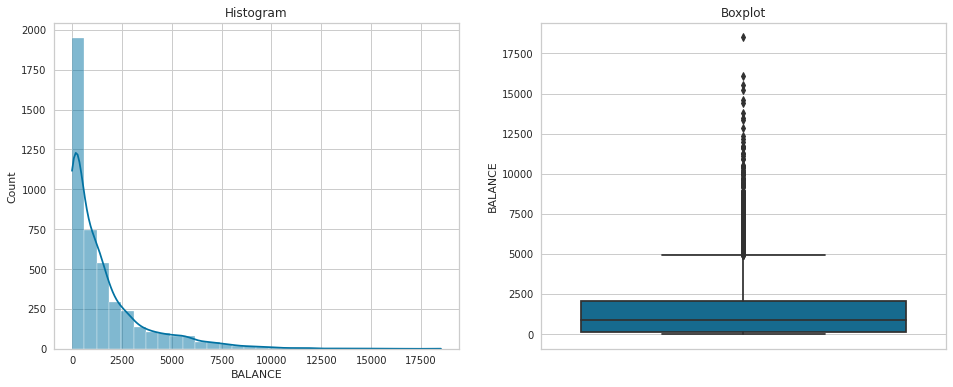

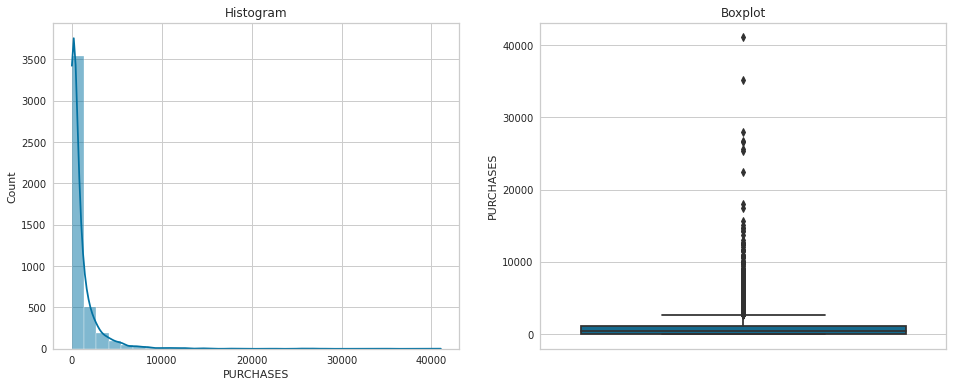

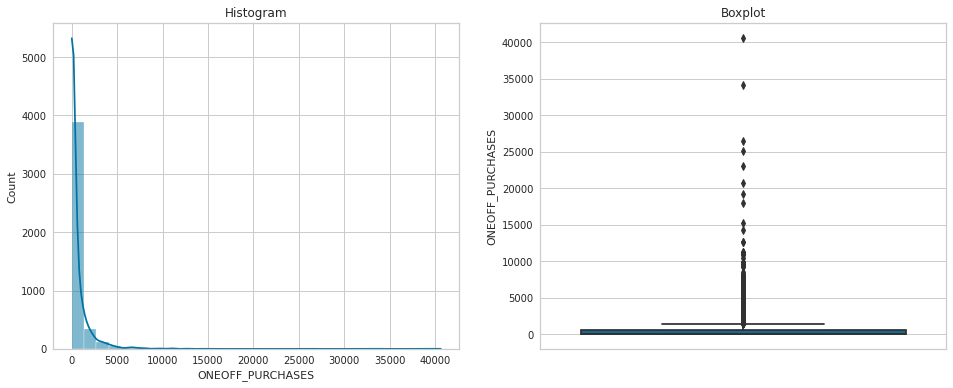

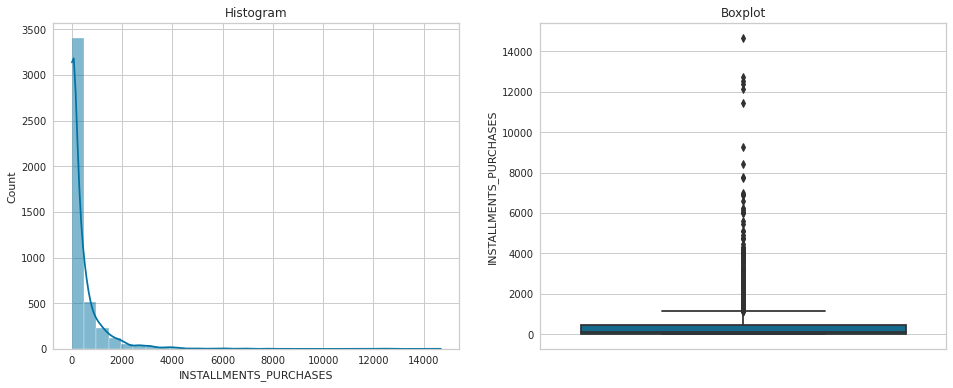

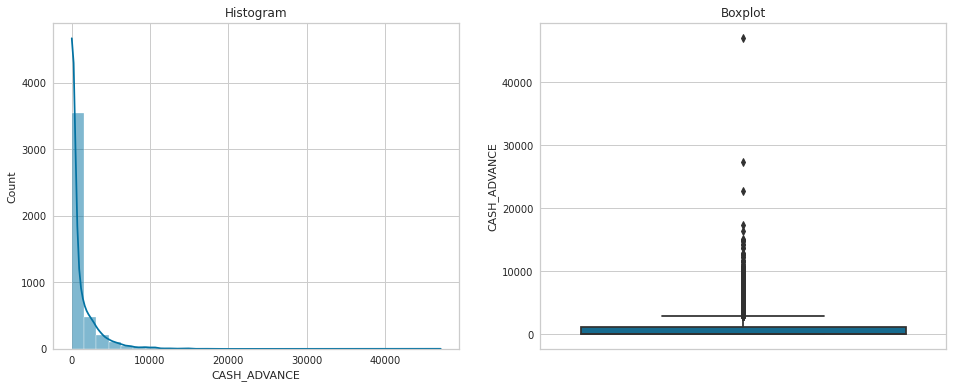

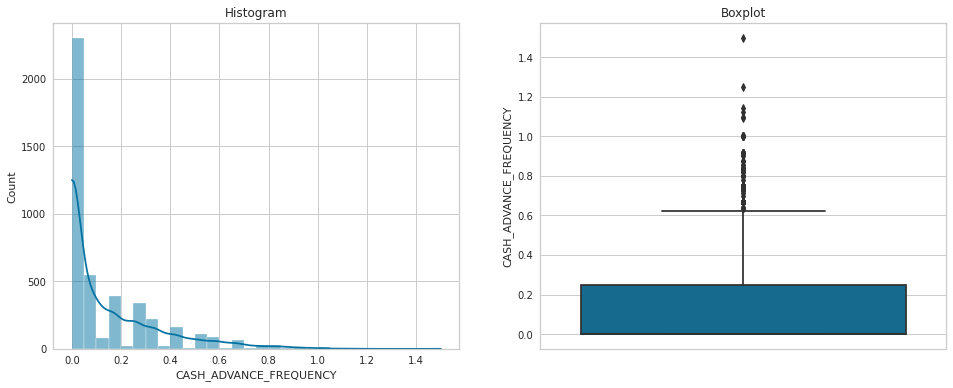

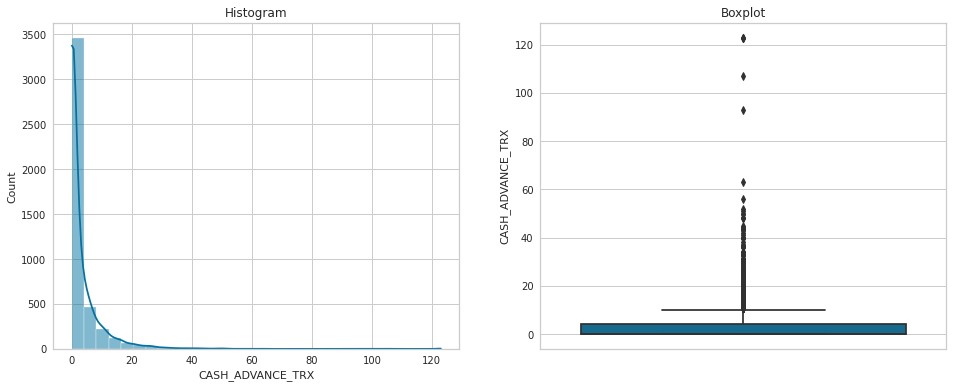

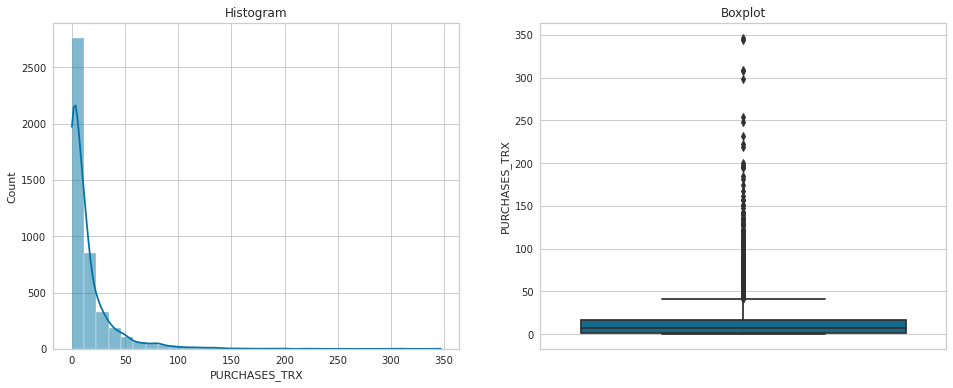

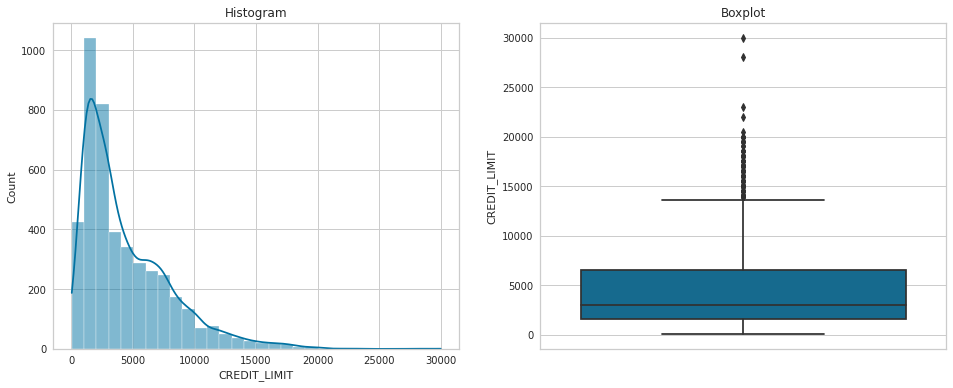

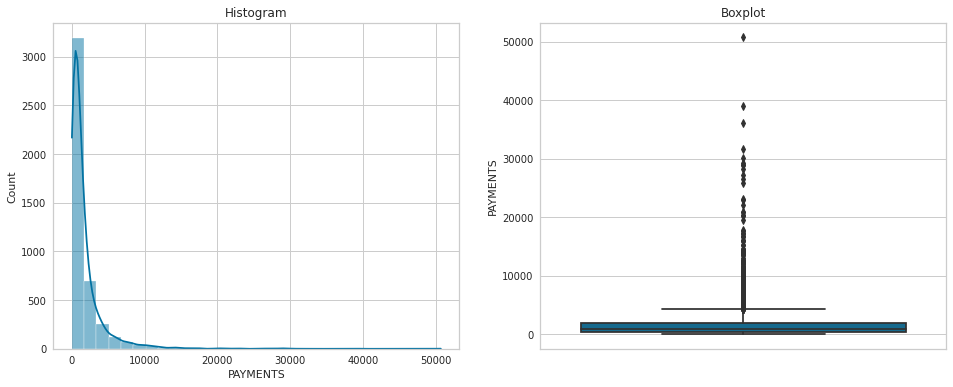

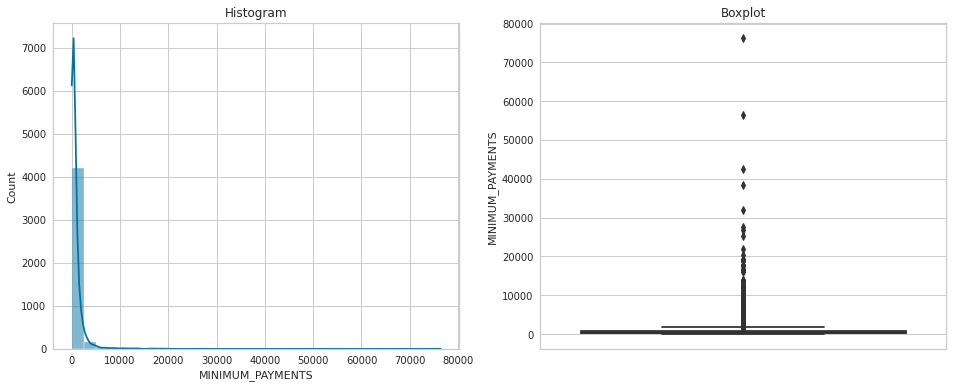

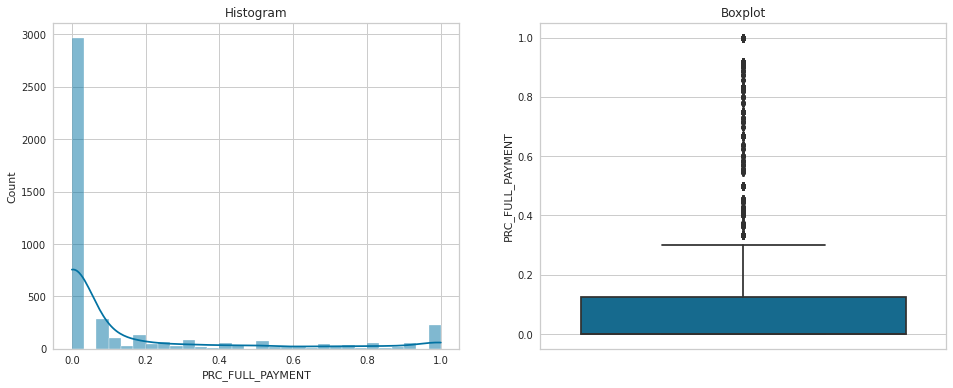

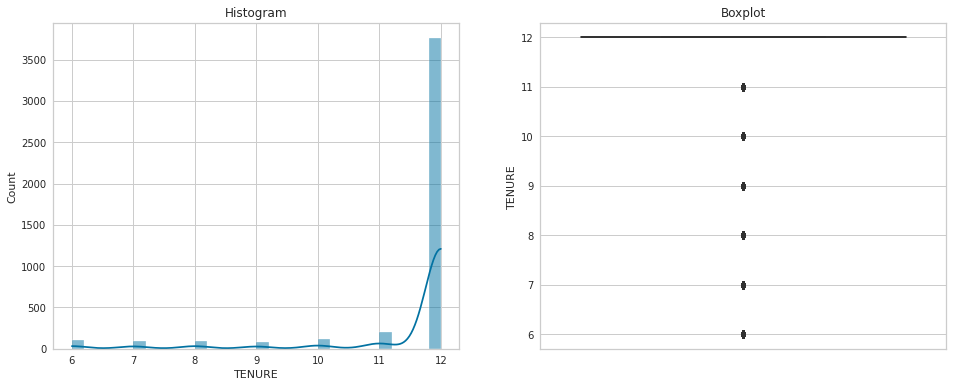

In [37]:
# plotting for numerical columns
for i in num_columns:
  outlier_plot(df_handling1[i])

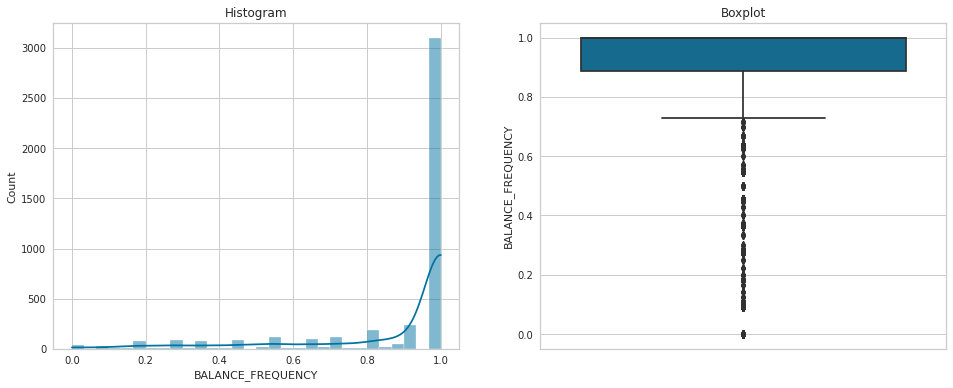

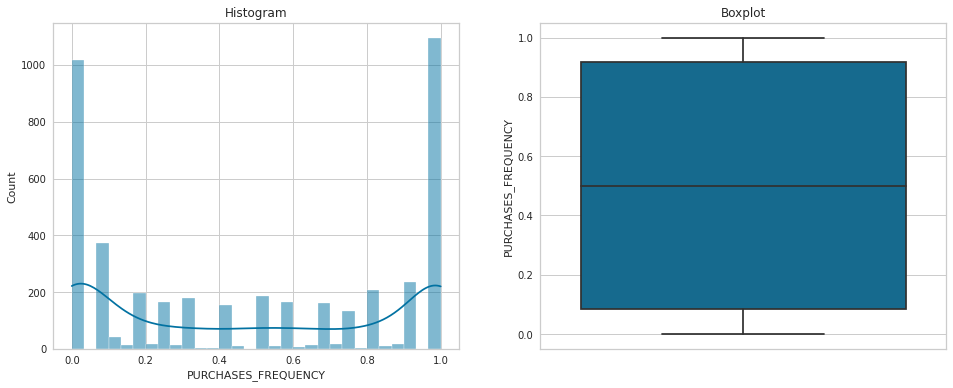

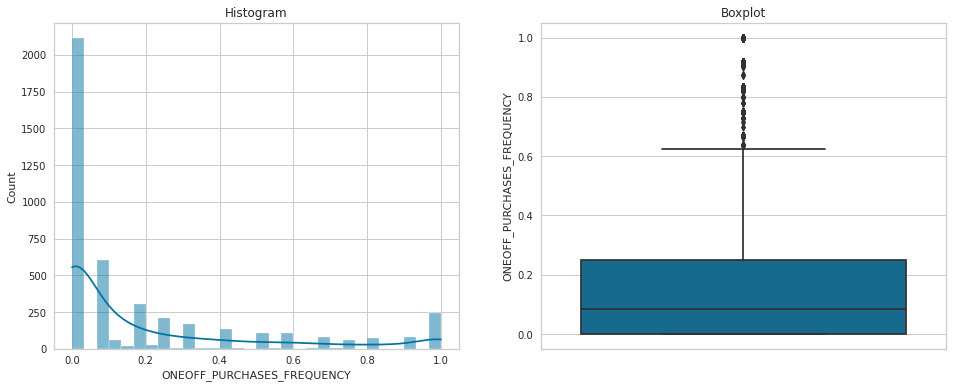

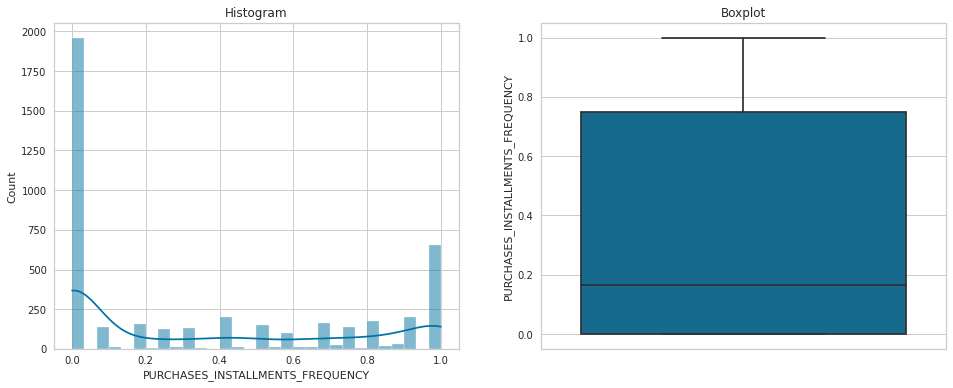

In [38]:
#mebuat plot dengan for
for i in cat_columns:
  outlier_plot(df_handling1[i])

- terdapat ouliers pada data dan seluruh data terdistribusi skew
- oulier di anggap natural karena berhubungan dengan credit card

<b><h1>Setelah peneliti lihat untuk disemua status data masih valid jadi peneliti tidak melakukan trimm atau censoring </h1></b>

## Feature Selection

In [39]:
# find corelation between features
data_cor = df_handling1.corr() 
data_cor

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,1.000000,-0.021197,0.018539,0.007194,0.005453,0.006615,-0.037151,0.008133,-0.006969,0.007163,-0.022295,-0.003264,0.000391,-0.019457,-0.002931,0.034764,-0.003951,0.005513
BALANCE,-0.021197,1.000000,0.320515,0.187344,0.168180,0.122525,0.519368,-0.077009,0.068101,-0.061011,0.467445,0.383809,0.158939,0.524289,0.315686,0.383552,-0.320599,0.071930
BALANCE_FREQUENCY,0.018539,0.320515,1.000000,0.135319,0.101523,0.126484,0.109329,0.226904,0.203086,0.172382,0.190898,0.137562,0.188024,0.087660,0.062254,0.127188,-0.066275,0.118400
PURCHASES,0.007194,0.187344,0.135319,1.000000,0.911880,0.628135,-0.053954,0.406175,0.505091,0.323757,-0.116636,-0.062400,0.696154,0.361017,0.613350,0.123776,0.179987,0.086846
ONEOFF_PURCHASES,0.005453,0.168180,0.101523,0.911880,1.000000,0.253439,-0.043837,0.266771,0.522751,0.125033,-0.084078,-0.048434,0.527258,0.324727,0.570896,0.067204,0.129665,0.068609
INSTALLMENTS_PURCHASES,0.006615,0.122525,0.126484,0.628135,0.253439,1.000000,-0.044145,0.451330,0.199231,0.525735,-0.115557,-0.055309,0.641046,0.235131,0.363362,0.164094,0.178588,0.074447
CASH_ADVANCE,-0.037151,0.519368,0.109329,-0.053954,-0.043837,-0.044145,1.000000,-0.210893,-0.079128,-0.168729,0.662095,0.681572,-0.048003,0.303143,0.418353,0.142941,-0.166890,-0.062418
PURCHASES_FREQUENCY,0.008133,-0.077009,0.226904,0.406175,0.266771,0.451330,-0.210893,1.000000,0.502518,0.860860,-0.298841,-0.187643,0.561993,0.105790,0.107935,0.019087,0.321028,0.051161
ONEOFF_PURCHASES_FREQUENCY,-0.006969,0.068101,0.203086,0.505091,0.522751,0.199231,-0.079128,0.502518,1.000000,0.136589,-0.105909,-0.052462,0.530452,0.266623,0.252908,-0.033723,0.176119,0.093659
PURCHASES_INSTALLMENTS_FREQUENCY,0.007163,-0.061011,0.172382,0.323757,0.125033,0.525735,-0.168729,0.860860,0.136589,1.000000,-0.248664,-0.153619,0.524521,0.048318,0.090344,0.046098,0.254876,0.054767


semua feature dipakai walaupun costumer id tidak dipakai, tapi karena kita mencari segmentasi user id

In [40]:
# split numeric dan categorical
num_columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX','PURCHASES_TRX', 'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
cat_columns =['CUST_ID','BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']
df_num = df_handling1[num_columns]
df_cat = df_handling1[cat_columns]
df_num

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,45.00,45.00,0.0,0.000000,0.000000,0,1,500.0,0.000000,313.980229,0.0,8
1,0.000000,176.03,176.03,0.0,0.000000,0.000000,0,1,7000.0,0.000000,313.980229,0.0,8
2,757.964752,157.40,157.40,0.0,0.000000,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,1150.00,1150.00,0.0,0.000000,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,600.00,600.00,0.0,0.000000,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,9629.808851,0.00,0.00,0.0,4372.393835,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4451,1040.030221,0.00,0.00,0.0,1390.648290,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4452,1322.818587,0.00,0.00,0.0,762.301096,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4453,1060.391273,0.00,0.00,0.0,1475.858013,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


## Feature Scaling

- Karena bentuk distribusi data skew maka scalling akan di lakukan dengan minmaxscaler

In [41]:
#minmax
scaler = MinMaxScaler()
scaler.fit(df_num)

df_num_scaled = scaler.transform(df_num)
df_num_scaled

array([[2.07248945e-04, 1.09621344e-03, 1.10771794e-03, ...,
        4.10910520e-03, 0.00000000e+00, 3.33333333e-01],
       [0.00000000e+00, 4.28814336e-03, 4.33314642e-03, ...,
        4.10910520e-03, 0.00000000e+00, 3.33333333e-01],
       [4.09809063e-02, 3.83431099e-03, 3.87455119e-03, ...,
        3.45335804e-02, 0.00000000e+00, 3.33333333e-01],
       ...,
       [7.15208780e-02, 0.00000000e+00, 0.00000000e+00, ...,
        4.09412344e-03, 0.00000000e+00, 8.33333333e-01],
       [5.73322114e-02, 0.00000000e+00, 0.00000000e+00, ...,
        3.62621901e-03, 0.00000000e+00, 8.33333333e-01],
       [1.86405521e-01, 4.99386120e-03, 5.04627061e-03, ...,
        1.07036552e-02, 0.00000000e+00, 8.33333333e-01]])

## Feature Encoding

Tidak Melakukan proses Encoding karena data Feature bertipe numerik semua

## Dimension Reduction

Lakukan dimension reduction untuk meringankan process clustering serta meningkatkan ketepatan hasil clustering.

In [42]:
#mendefinisikan dataframe
df_final = pd.DataFrame(df_num_scaled, columns=num_columns)
df_final

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.000207,0.001096,0.001108,0.0,0.000000,0.000000,0.000000,0.002882,0.015025,0.000000,0.004109,0.0,0.333333
1,0.000000,0.004288,0.004333,0.0,0.000000,0.000000,0.000000,0.002882,0.232053,0.000000,0.004109,0.0,0.333333
2,0.040981,0.003834,0.003875,0.0,0.000000,0.000000,0.000000,0.017291,0.038397,0.029464,0.034534,0.0,0.333333
3,0.014304,0.028014,0.028308,0.0,0.000000,0.000000,0.000000,0.002882,0.038397,0.059726,0.001118,0.0,0.333333
4,0.023823,0.014616,0.014770,0.0,0.000000,0.000000,0.000000,0.002882,0.031720,0.004245,0.001804,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,0.520655,0.000000,0.000000,0.0,0.092759,0.363637,0.073171,0.000000,0.398998,0.048677,0.027933,0.0,0.833333
4451,0.056231,0.000000,0.000000,0.0,0.029502,0.363637,0.146341,0.000000,0.045075,0.005720,0.003769,0.0,0.833333
4452,0.071521,0.000000,0.000000,0.0,0.016172,0.363637,0.089431,0.000000,0.048414,0.020418,0.004094,0.0,0.833333
4453,0.057332,0.000000,0.000000,0.0,0.031310,0.363637,0.081301,0.000000,0.065109,0.008031,0.003626,0.0,0.833333


###VIF

Lakukan VIF untuk melihat banyaknya dimensi yang di rekomendasikan

In [43]:
#mendefinisikan VIF
vif_data = pd.DataFrame()
vif_data["features"] = df_final.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_final.values, i)
                        for i in range(len(df_final.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,features,VIF
1,PURCHASES,53991.274248
2,ONEOFF_PURCHASES,31910.884070
3,INSTALLMENTS_PURCHASES,9543.084469
5,CASH_ADVANCE_FREQUENCY,4.376124
8,CREDIT_LIMIT,4.301693
0,BALANCE,3.914007
6,CASH_ADVANCE_TRX,3.689696
4,CASH_ADVANCE,3.549663
9,PAYMENTS,3.435148
12,TENURE,3.146364


- Jumlah dimensi yang direkomendasikan ditunjukkan dari banyaknya kolom dengan nilai VIF diatas 5 yakni 6 dimensi

## EVR

In [44]:
#pca
pca = PCA()
pca.fit(df_final)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(cumsum)
print(d)

[0.43631328 0.6882379  0.82644627 0.90112268 0.93751084 0.96091116
 0.97336789 0.98234093 0.98920831 0.99372981 0.99755386 0.99999986
 1.        ]
6


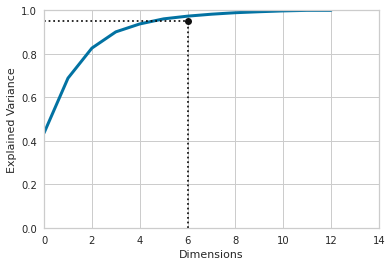

In [45]:
#dimensi plot
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

- HASIL EVR 6 DIMENSI SUDAH MENCAKUP 95% DARI DATA

## PCA

In [46]:
## PCA dilakukan
pca = PCA(n_components=6)
pca.fit(df_final)
df_reduce= pca.transform(df_final)

## N cluster

In [47]:
#Matikan warnings
warnings.filterwarnings('ignore')

In [48]:
#Mendefinisikan n cluster denga algoritman Kmeans
kmeans_per_k = [KMeans(n_clusters=k, random_state=21).fit(df_reduce)
                for k in range(1, 9)]

Elbow Method


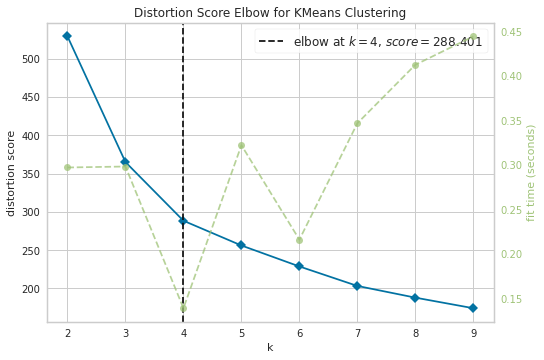

In [49]:
#print elbow
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(df_reduce)
Elbow_M.show()

In [50]:
#iterasi K
k=[2,3,4,5,6,7,8,9]
kmeans_per_k = [KMeans(n_clusters=k, random_state=21).fit(df_reduce)
                for k in range(1, 9)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [51]:
#membuat silohuet
silhouette_scores = [silhouette_score(df_reduce, model.labels_)
                     for model in kmeans_per_k[1:]]

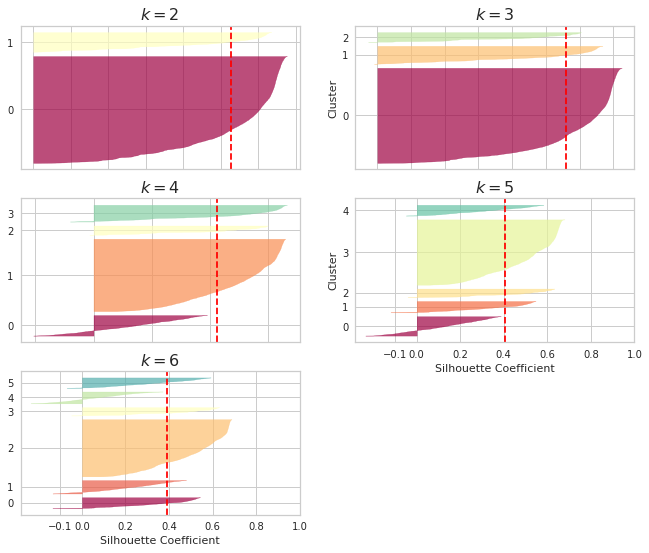

In [52]:
#plot predik dengan kmeans
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df_reduce, y_pred)

    padding = len(df_reduce) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

- melihat dari elbow dan silhoute score jumlah clustter yang di rekomendasikan adalah 3, karena semua bentuk melewati garis merah dan sejajar

# 6 - Model Definition

- model definition akan menggunakan algoritma Kmeans dan membuat bentuk 2d
-Spectral Clustering
-dbscan

# 7 - Model Training

- model training ini menggunakan ncluster hasil dari elbow dan silhoutte score

In [53]:
#model training
Kmeans = KMeans(n_clusters=3, random_state=21)
%timeit Kmeans.fit(df_reduce)

262 ms ± 117 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
#model training
sc1 = SpectralClustering(n_clusters=3, random_state=42)
sc1.fit(df_reduce)

SpectralClustering(n_clusters=3, random_state=42)

In [55]:
#model training
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(df_reduce)

DBSCAN(eps=0.05)

# 8 - Model Evaluation

peneliti akan melakukan dengan v3 algoritma dan akan memilih yang terbaik

## a. DBSCAN

In [56]:
#definisi x dan y dengan make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [57]:
#label
dbscan.labels_[:10]

array([ 0, -1,  0,  0,  0,  0,  0, -1,  1,  2])

In [58]:
#panjang sample
len(dbscan.core_sample_indices_)

2757

In [59]:
#sample
dbscan.core_sample_indices_[:10]

array([ 0,  2,  3,  4,  5,  6,  8,  9, 10, 11])

In [60]:
#memanggil method componen
dbscan.components_[:3]

array([[-1.06610059e-01,  5.93355806e-01, -1.81889768e-01,
         8.54659148e-02,  3.27262754e-04,  8.58483429e-03],
       [-1.11855530e-01,  5.85925366e-01, -1.40725976e-01,
         1.12445910e-01,  2.38729146e-03,  3.01903919e-02],
       [-1.06336001e-01,  5.85852069e-01, -1.47662944e-01,
         1.15743272e-01,  1.54104147e-02, -5.02577822e-03]])

In [61]:
#mencari unique dbscan label
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37])

In [62]:
#Mendefinisikan dbscan 2
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(df_reduce)

DBSCAN(eps=0.2)

In [63]:
#membuat fungsi untuk dbscan
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

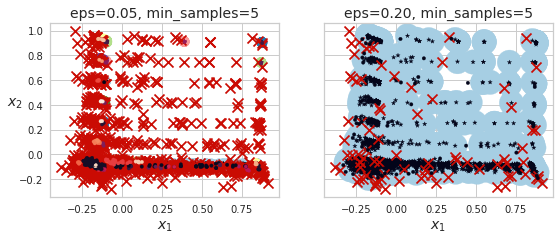

In [64]:
#membuat plot dbscan
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, df_reduce, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, df_reduce, size=600, show_ylabels=False)
plt.show()

In [65]:
#membuat dbscan label
clusters0 = df_handling1.copy()
clusters0['cluster_sbscan'] = dbscan.labels_
clusters0

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_sbscan
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,313.980229,0.0,8,0
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,313.980229,0.0,8,-1
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,0
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,-1
4451,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,-1
4452,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,-1
4453,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,-1


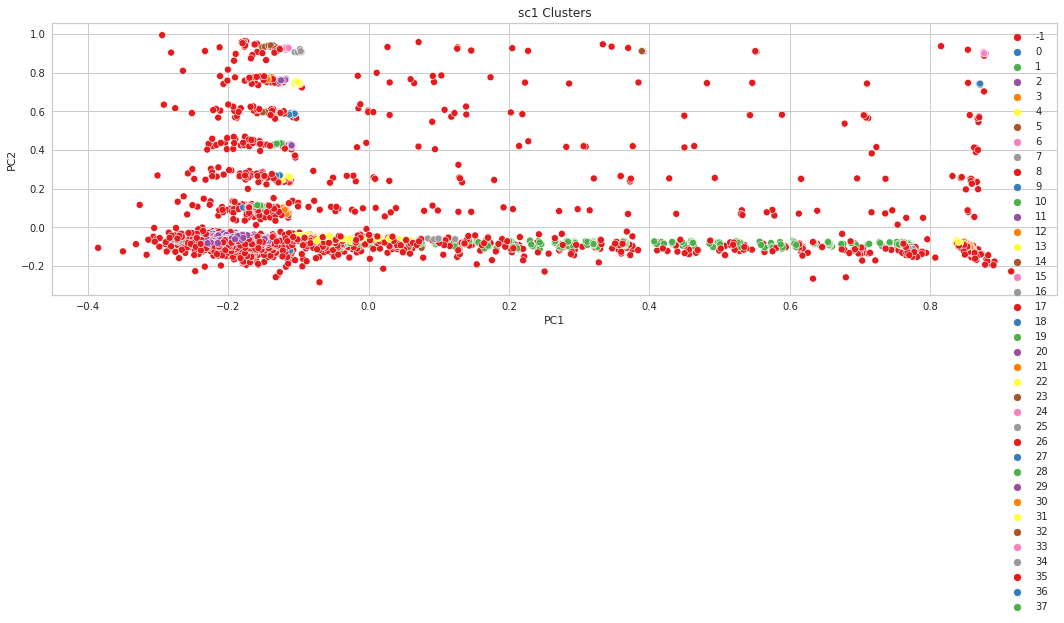

In [106]:
#melihat cluster
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=dbscan.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('sc1 Clusters')
plt.show()

## EDA SETELAH CLUSTERING DBSCAN

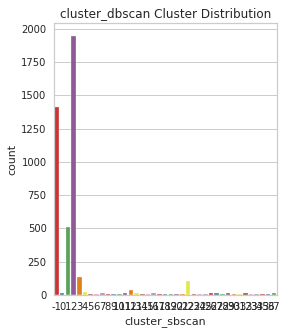

In [68]:
#membuat plot
plt.figure(figsize=(4, 5))
sns.countplot(data=clusters0, x='cluster_sbscan', palette='Set1')
plt.title('cluster_dbscan Cluster Distribution')
plt.show()

Terlalu banyak pengelompokan dikarenakan untuk algo dbscan mencari data sample

## b. Spectral Clustering

In [70]:
#mencari percentil
np.percentile(sc1.affinity_matrix_, 95)

0.9888316274139135

In [71]:
#membuat fungsi spektral
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

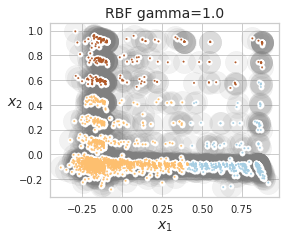

In [72]:
#melihat gamma
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, df_reduce, size=500, alpha=0.1)


terlihat dari gamma ada pembagian 3 cluster

In [73]:
#mendefinisikan cluster
clusters1 = df_handling1.copy()
clusters1['cluster_spectral'] = sc1.labels_
clusters1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_spectral
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,313.980229,0.0,8,2
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,313.980229,0.0,8,2
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,2
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,2
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,1
4451,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,1
4452,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,1
4453,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,1


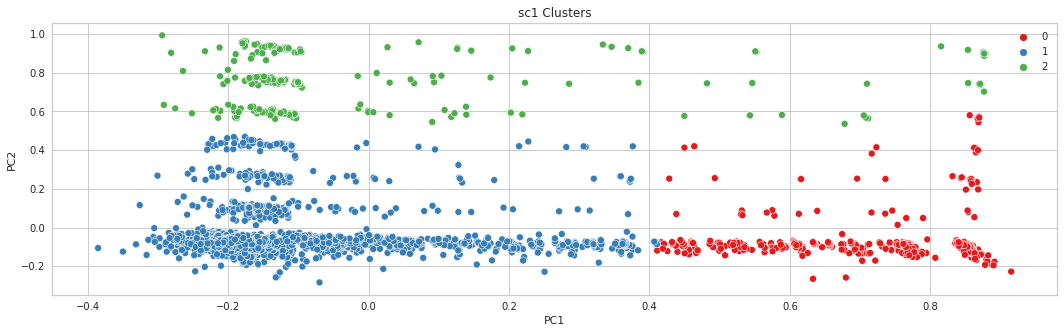

In [105]:
#membuat plot distribusi clusternnya
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=sc1.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('sc1 Clusters')
plt.show()

## EDA SETELAH CLUSTERING Spectral

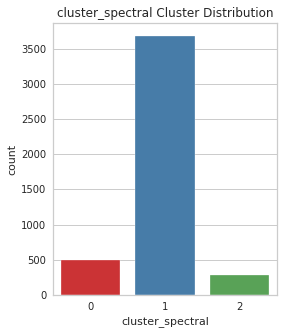

In [75]:
#membuat plot
plt.figure(figsize=(4, 5))
sns.countplot(data=clusters1, x='cluster_spectral', palette='Set1')
plt.title('cluster_spectral Cluster Distribution')
plt.show()

tertinggi di cluster 1

In [76]:
#mencoba pemisahan cluster
cluster_spektral0 = clusters1[clusters1['cluster_spectral'] == 0]
cluster_spektral1 = clusters1[clusters1['cluster_spectral'] == 1]
cluster_spektral2 = clusters1[clusters1['cluster_spectral'] == 2]

In [103]:
#membuat data summary
summaryspektral = pd.DataFrame()
summaryspektral['cluster_spektral'] = [0,1,2]

for i in num_columns:
    data = []
    data.append(cluster0[i].mean())
    data.append(cluster1[i].mean())
    data.append(cluster2[i].mean())

    summaryspektral[i] = data

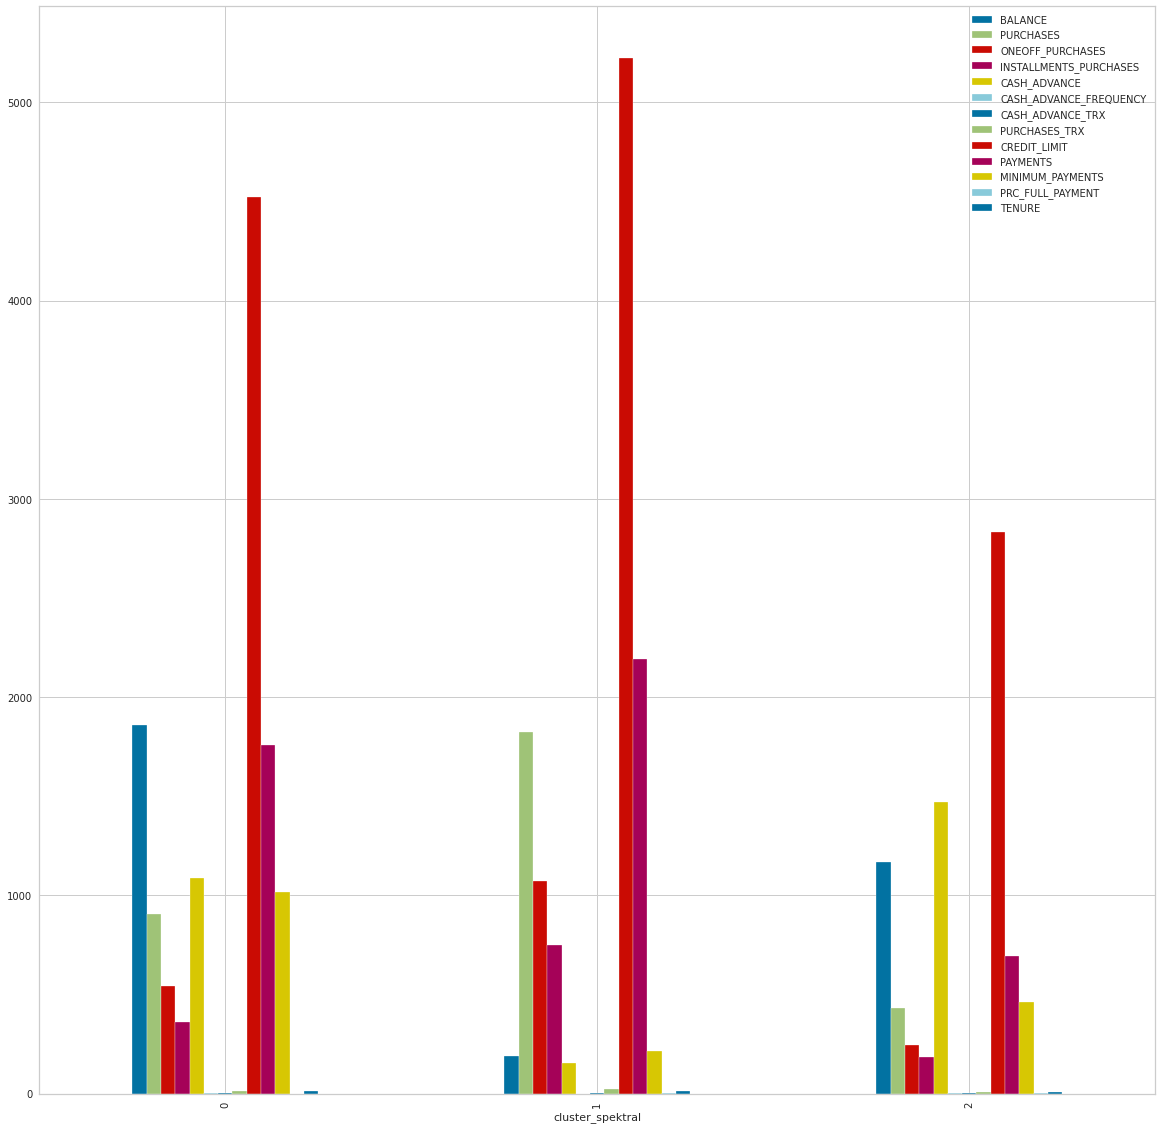

In [104]:
#plotting setiap cluster
data_plot = summaryspektral.set_index('cluster_spektral')
data_plot.plot(kind='bar', figsize=(20, 20),)

In [80]:
#melihat summery spektral cluster
summaryspektral

,cluster_spektral
0,0
1,1
2,2


In [81]:
print('user cluster 0: ', cluster_spektral0.CUST_ID.nunique())
print('user cluster 1: ', cluster_spektral1.CUST_ID.nunique())
print('user cluster 2: ', cluster_spektral2.CUST_ID.nunique())

user cluster 0:  492
user cluster 1:  3678
user cluster 2:  285


-di cluster 0 pengelompokan user puchase dan payment tertinggi tetapi balance terendah<br>
-Di cluster 1 terjadi pengelompokan minimum payment tertinggi<br>
-di cluster 2 terjadi pengelompokan purchase terendah

## C. Kmean

## membuat 2D

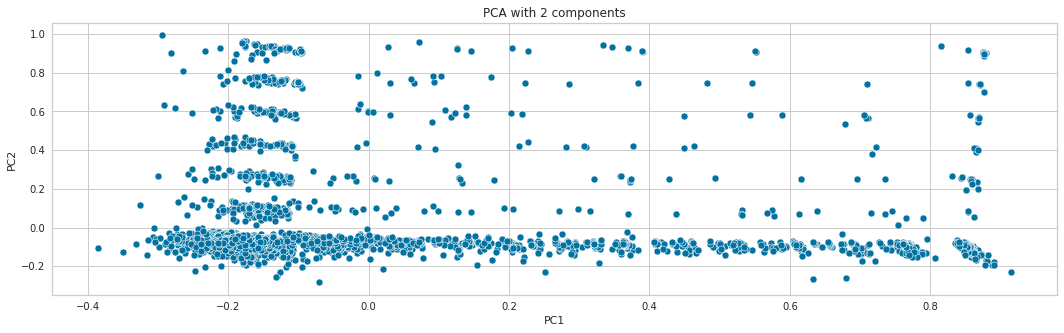

In [82]:
#membuat 2d
pca_2d = PCA(n_components=2, random_state=21)
X_2d  = pca_2d.fit_transform(df_reduce)

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

In [83]:
#mendefinisikan cluster untuk kmeans
clusters = df_handling1.copy()
clusters['cluster_kmeans'] = Kmeans.labels_
clusters

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_kmeans
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,313.980229,0.0,8,2
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,313.980229,0.0,8,2
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,2
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,2
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,0
4451,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,0
4452,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,0
4453,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,0


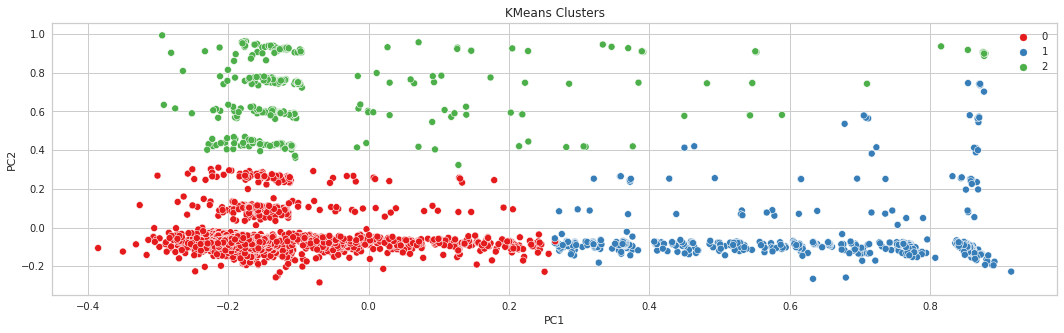

In [84]:
#melihat distribusi cluster kmeans
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=Kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

## EDA SETELAH CLUSTERING KMEANS

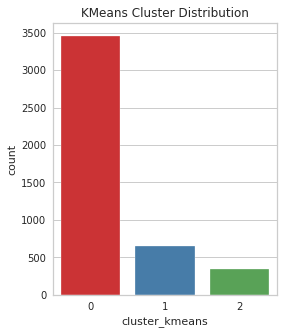

In [85]:
#membuat plot
plt.figure(figsize=(4, 5))
sns.countplot(data=clusters, x='cluster_kmeans', palette='Set1')
plt.title('KMeans Cluster Distribution')
plt.show()

- dari clluster stelah di eda terdapat 0 cluster paling dominan di antara yang lain yaitu cluster 0

In [86]:
#mencoba pemisahan cluster
cluster0 = clusters[clusters['cluster_kmeans'] == 0]
cluster1 = clusters[clusters['cluster_kmeans'] == 1]
cluster2 = clusters[clusters['cluster_kmeans'] == 2]


In [87]:
#membuat data summary
summary = pd.DataFrame()
summary['cluster'] = [0,1,2]

for i in num_columns:
    data = []
    data.append(cluster0[i].mean())
    data.append(cluster1[i].mean())
    data.append(cluster2[i].mean())

    summary[i] = data

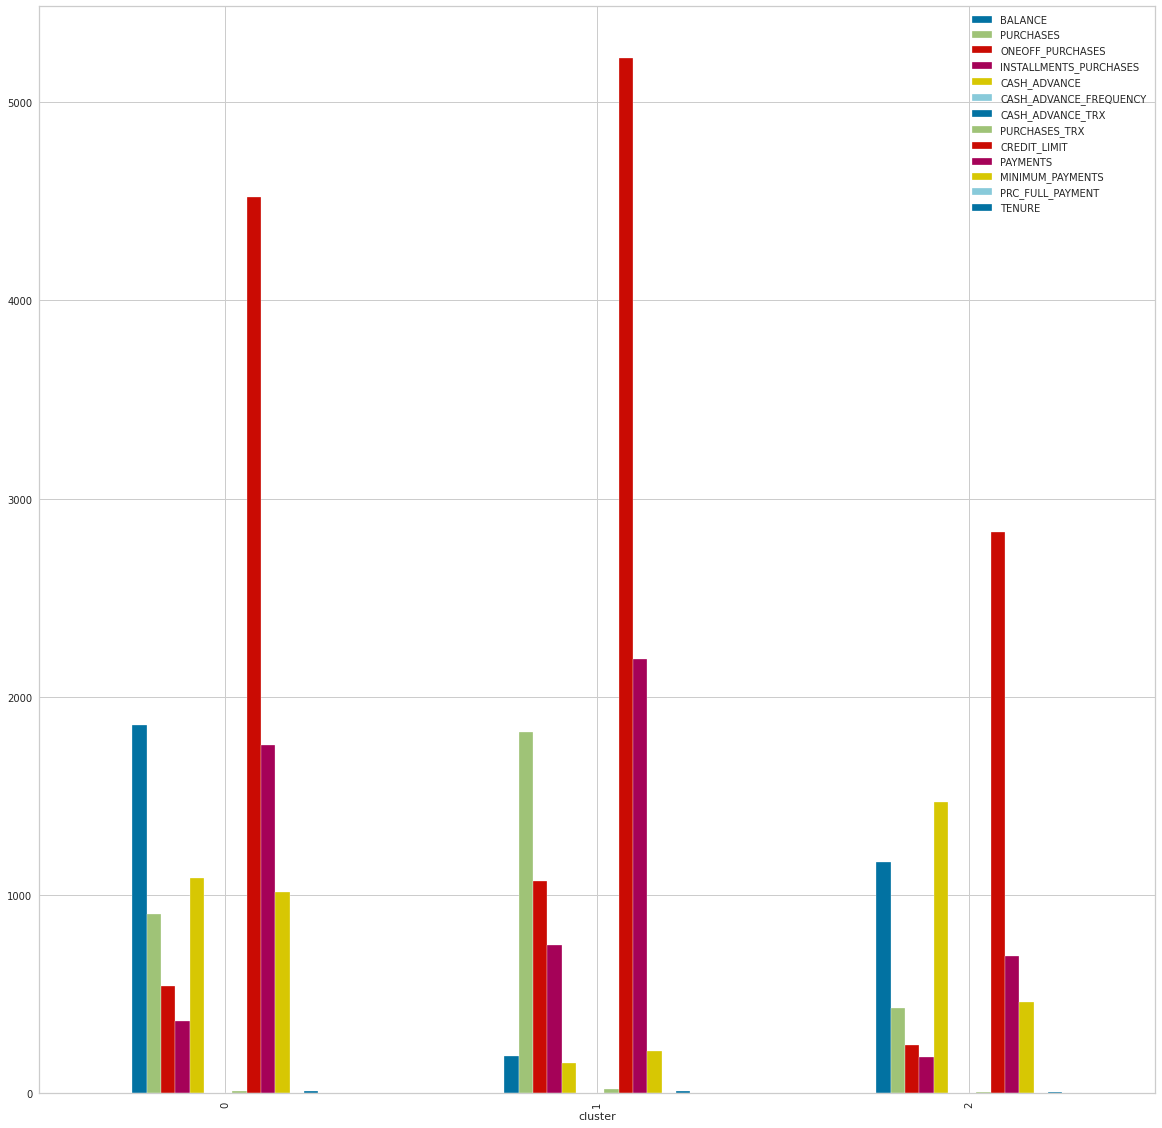

In [88]:
#plotting setiap cluster
data_plot = summary.set_index('cluster')
data_plot.plot(kind='bar', figsize=(20, 20),)

In [89]:
summary

,cluster,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,1856.421475,906.830223,543.924294,362.935379,1087.229660,0.149012,3.731616,14.075565,4521.235955,1756.481735,1014.235718,0.036422,11.893167
1,1,190.581249,1822.374439,1073.254654,750.075238,155.065385,0.018066,0.540707,24.534562,5222.733557,2191.163372,215.017876,0.774679,11.728111
2,2,1167.708053,429.984171,244.718543,186.122771,1472.067436,0.226650,4.145714,5.525714,2832.380952,694.370447,459.198802,0.110745,7.414286


- data dominasi oleh BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
- pada cluster 0 menunjukan MINIMUM_PAYMENTS terbanyak
- sedangkan pada cluster 1 di isi balance sedikit dan purchase terbanyak 
- untuk CASH_ADVANCE tertinggi diisi oleh cluter 2

In [90]:
print('user cluster 0: ', cluster0.CUST_ID.nunique())
print('user cluster 1: ', cluster1.CUST_ID.nunique())
print('user cluster 2: ', cluster2.CUST_ID.nunique())

user cluster 0:  3454
user cluster 1:  651
user cluster 2:  350


user terbanyak ada di cluster 0 artinya minimum paymen terbanyak disana

<h1>Peneliti memutuskan memakai model KMEANS karena pengelompokannya lebih merata dari pada algoritma cluster lainnya

# 9 MODEL- INFRENCE

In [91]:
#show data_inf
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,8691,6644.829230,1.000000,0.00,0.00,0.00,2557.006793,0.000000,0.000000,0.000000,0.250000,9,0,7600.0,1648.570068,2284.360915,0.000000,12
1,7711,7.696813,0.090909,111.30,111.30,0.00,101.656544,0.083333,0.083333,0.000000,0.083333,1,2,1200.0,0.000000,NaN,0.000000,12
2,1795,850.630114,1.000000,0.05,0.05,0.00,1700.634586,0.083333,0.083333,0.000000,0.333333,7,1,1000.0,1084.281127,367.409536,0.000000,12
3,2849,391.508345,0.888889,80.99,80.99,0.00,2867.104779,0.111111,0.111111,0.000000,0.333333,3,1,1500.0,3855.328673,149.615036,0.200000,9
4,6567,349.855056,1.000000,3200.50,2097.88,1102.62,0.000000,1.000000,1.000000,1.000000,0.000000,0,50,7000.0,3119.528249,192.900599,1.000000,12
5,8911,900.229315,1.000000,250.72,250.72,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,6,6500.0,2362.786253,259.315944,0.083333,12
6,8355,150.071799,0.818182,1800.00,0.00,1800.00,0.000000,0.750000,0.000000,0.666667,0.000000,0,9,5000.0,2021.257541,166.582953,1.000000,12
7,5549,4858.925320,1.000000,9282.12,1578.86,7703.26,4446.461559,0.833333,0.500000,0.666667,0.083333,1,111,9000.0,16822.586450,3983.471892,0.000000,12
8,5753,955.117067,1.000000,0.00,0.00,0.00,3798.701398,0.000000,0.000000,0.000000,0.500000,13,0,4500.0,2413.364689,284.390966,0.000000,12
9,2189,7024.269179,1.000000,130.40,0.00,130.40,1916.534565,0.333333,0.000000,0.250000,0.083333,1,4,10200.0,0.000000,NaN,0.000000,12


In [92]:
#duplicate data_inf
data_inf1 = data_inf.copy()

In [93]:
# check missing value 
data_inf.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    2
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [94]:
#mendefinisikan df yang sudah di handling
data_inf_final = data_inf.fillna(data_inf['MINIMUM_PAYMENTS'].median())

In [95]:
# check missing value 
data_inf_final.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

rubah ke median miss value

In [96]:
df_inf_num= data_inf_final[num_columns]

In [97]:
# lakukan scalling
df_inf_scaled = scaler.transform(df_inf_num) 
df_inf_final = pd.DataFrame( df_inf_scaled , columns=num_columns)

In [98]:
#pca
df_inf_reduce = pca.transform(df_inf_final)

In [99]:
#model
data_inf_cluster = data_inf.copy()

data_inf_cluster['cluster_kmeans'] = Kmeans.predict(df_inf_reduce)

In [ ]:
data_inf_cluster

In [101]:
data_inf_cluster.groupby(['cluster_kmeans','BALANCE','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS'])[["CUST_ID"]].mean()

CUST_ID
cluster_kmeans BALANCE     CASH_ADVANCE CREDIT_LIMIT PAYMENTS     MINIMUM_PAYMENTS         
0              400.554448  1157.684242  3000.0       2123.969813  180.059986         3643.0
               635.358243  0.000000     8000.0       4995.053024  284.706930         7205.0
               850.630114  1700.634586  1000.0       1084.281127  367.409536         1795.0
               900.229315  0.000000     6500.0       2362.786253  259.315944         8911.0
               955.117067  3798.701398  4500.0       2413.364689  284.390966         5753.0
               1024.761905 0.000000     1200.0       555.233730   303.743033         1367.0
               1854.659145 443.392028   2000.0       496.543523   591.508322         1525.0
               2011.929899 0.000000     7000.0       517.558081   1109.232571        5137.0
               2944.156996 244.694657   3000.0       628.314620   1288.695715        1493.0
               4858.925320 4446.461559  9000.0       16822.586450 3983.471892        5549.0
               5329.544052 0.000000     5500.0       1587.462442  2098.664454         209.0
               5484.339435 5990.590134  6000.0       1229.434538  2453.164396        3129.0
               6644.829230 2557.006793  7600.0       1648.570068  2284.360915        8691.0
               8625.355309 8004.403258  12000.0      3732.923009  3577.000998        5791.0
1              55.805523   0.000000     5700.0       1278.431749  177.351498         3137.0
               150.071799  0.000000     5000.0       2021.257541  166.582953         8355.0
               349.855056  0.000000     7000.0       3119.528249  192.900599         6567.0
2              391.508345  2867.104779  1500.0       3855.328673  149.615036         2849.0

- pada cluster 0 adalah pengelompokan cust balance tinggi
- pada cluster 1 adalah pengelompokan cust id cash advance tidak ada
- pada cluster 2  adalah pengelompokan oleh costumer minimum payment yang kecil

#10-Pengambilan Kesimpulan

<li>dari eda Saldo yang sering diperbarui adalah saldo yang limit balancennya besar,jumlah pembelian dari semua acount dari rate 0 sampai 18.00 yang banyak, balance 2500 menumpunk angsuran di 2000,Uang tunai yang diberikan pengguna tertumpuk di nomor 02, yang artinya tidak begitu sering transaksi dengan uang muka
<li>dari modeling algoritma yang dipakai
<li>dbmeans, terjadi pengelompokan menyebar dan tidak spesifik
<li>spektral, user cluster 1 terbanyak,dan pengelompokan usernnya
<br>-di cluster 0 pengelompokan user puchase dan payment tertinggi tetapi balance terendah
<br>-Di cluster 1 terjadi pengelompokan minimum payment tertinggi
<br>-di cluster 2 terjadi pengelompokan purchase terendah
<li>Kmeans,data dominasi oleh BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
pada cluster 0 menunjukan MINIMUM_PAYMENTS terbanyak
sedangkan pada cluster 1 di isi balance sedikit dan purchase terbanyak
untuk CASH_ADVANCE tertinggi diisi oleh cluter 2
<br>dan tertumpuk di cluser 0
<li>peneliti memakai 3 cluster sesuai dengan model evaluasi


#Conceptual Problems

<b>1.Apakah yang dimaksud dengan inertia pada algoritma K-Means ??</b>


---
Karena di algoritma kmeans menghiung jarak dr setiap data ke setiap centroid dan mengasign ke centroid dg jarak tertentu, karena algoritma memang ingin mengoptimasi (dlm hal ini minimum jarak ke setiap centroidnya) maka mudahnya menghitung jaraknya lalu kita rata2kan, d sklearn total jaraknya disebut inertia (inertia yg semakin kecil semakin baik kmeansnya). Inertia meminimumkan (jarak antara dlm 1 kluster)


<b>2.Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !</b>


---
namun jika kita tambah lagi jumlah kluster maka nilai inertia akan berkurang. lalu dimanakah limit dari inertia? limitnya adlaah dimana nilai inersia = 0. Karena setiap data point memiliki clusternya masing-masing. Lebih kecil inersia maka lebih baik kluster yang sesuai.   Lalu Bagaimana menemukan kluster fit yang sesuai? Untuk menemukan ini, kita bisa gunakan elbow method. <b>Dimana metode ini membandingkan jumlah kluster dengan inersianya. 


<b>3.Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !</b>


---
<li>k-means clustering merupakan algoritma unspervised learning berbasis centroid, dimana setiap cluster diasosiasikan dengan centroid. Tujuan utama dari algoritma ini adalah untuk meminimalkan jumlah jarak antara titik data dan cluster yang sesuai.
<li>DBSCAN merupakan algoritma yang menggunakan clustering berbasis density atau kepadatan.
<li>Spectral Clustering, pengelompokkan didasarkan atas kesamaan antara setiap data.
Kesamaan tersebut dilihat dari keterkaitan antara setiap data. Pada Spectral Clustering
akan dibentuk sebuah graph dari data yang ada. Di mana verteks dari graph tersebut
merupakan setiap pada data. Edgenya berupa hubungan antar data yang biasanya bernilai
jarak dari dua record yang berhubungan
